In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import nan
import math

lupinus = pd.read_csv('datasets/lupinus.txt', delimiter='\t')
poll = pd.read_csv('datasets/plant_pollinator_diversity_set2.csv')

In [2]:
lupinus.head()

,Year,Experiment,Plant ID,Maternal plot,Maternal CO2,Maternal N,Offspring ring,Offspring CO2,Seed mass,Emergence date,10 July leaf #,10 July leaflet length,August leaf #,August leaflet length,root length (cm),aboveground biomass (g)
0,2006,E141,4048,NaN,NaN,NaN,3,elevated,NaN,13.0,1.0,17,1,53.0,NaN,NaN
1,2006,E141,5212,30.0,elevated,elevated,5,elevated,0.0257,13.0,4.0,24,4,26.0,15.0,0.27
2,2006,E141,5104,33.0,elevated,ambient,5,elevated,0.0259,16.0,4.0,19,6,26.0,14.5,0.14
3,2006,E141,4323,13.0,elevated,elevated,3,elevated,0.0278,19.0,4.0,23,7,30.0,NaN,NaN
4,2006,E141,5616,13.0,elevated,elevated,6,ambient,0.0278,19.0,3.0,23,6,25.0,11.5,0.24


In [3]:
lupinus['10 July leaflet length'].value_counts()

20                 28
19                 27
21                 23
22                 20
23                 17
24                 17
15                 13
18                 11
25                  9
16                  8
12                  7
13                  7
26                  4
17                  4
10                  3
14                  3
29                  2
27                  2
8                   2
30                  2
11                  2
immature            1
13 (herbvy)         1
20 (shrivelled)     1
28                  1
shriveled           1
15 (herbvy)         1
9                   1
shrivelled          1
24 (closed)         1
5                   1
23 (herbvy)         1
Name: 10 July leaflet length, dtype: int64

In [4]:
lupinus['August leaflet length'].value_counts()

25.0    32
24.0    30
28.0    20
22.0    18
26.0    17
30.0    13
20.0    13
23.0    12
21.0    12
27.0    10
29.0     8
32.0     5
19.0     4
31.0     4
34.0     3
18.0     3
37.0     2
36.0     1
53.0     1
Name: August leaflet length, dtype: int64

In [5]:
lupinus['10 July leaflet length_new'] = lupinus['10 July leaflet length'].str.extract(r'(\d+)')
lupinus['10 July leaflet length_new'] = pd.to_numeric(lupinus['10 July leaflet length_new'], errors='coerce').dropna()
lupinus['10 July leaflet length_new'].value_counts()

20.0    29
19.0    27
21.0    23
22.0    20
23.0    18
24.0    18
15.0    14
18.0    11
25.0     9
13.0     8
16.0     8
12.0     7
26.0     4
17.0     4
10.0     3
14.0     3
27.0     2
11.0     2
29.0     2
30.0     2
8.0      2
9.0      1
28.0     1
5.0      1
Name: 10 July leaflet length_new, dtype: int64

In [6]:
lupinus.shape

(236, 17)

In [7]:
lupinus.head()

,Year,Experiment,Plant ID,Maternal plot,Maternal CO2,Maternal N,Offspring ring,Offspring CO2,Seed mass,Emergence date,10 July leaf #,10 July leaflet length,August leaf #,August leaflet length,root length (cm),aboveground biomass (g),10 July leaflet length_new
0,2006,E141,4048,NaN,NaN,NaN,3,elevated,NaN,13.0,1.0,17,1,53.0,NaN,NaN,17.0
1,2006,E141,5212,30.0,elevated,elevated,5,elevated,0.0257,13.0,4.0,24,4,26.0,15.0,0.27,24.0
2,2006,E141,5104,33.0,elevated,ambient,5,elevated,0.0259,16.0,4.0,19,6,26.0,14.5,0.14,19.0
3,2006,E141,4323,13.0,elevated,elevated,3,elevated,0.0278,19.0,4.0,23,7,30.0,NaN,NaN,23.0
4,2006,E141,5616,13.0,elevated,elevated,6,ambient,0.0278,19.0,3.0,23,6,25.0,11.5,0.24,23.0


In [8]:
type(lupinus['August leaflet length'][0])

numpy.float64

In [9]:
lupinus.shape

(236, 17)

In [10]:
type(lupinus['10 July leaflet length_new'][0])

numpy.float64

In [11]:
test = lupinus.groupby(['Maternal plot', 'Offspring CO2']).mean('aboveground biomass (g)').sort_values(['aboveground biomass (g)'])['aboveground biomass (g)'].to_frame().reset_index()
test

,Maternal plot,Offspring CO2,aboveground biomass (g)
0,354.0,ambient,0.080
1,67.0,ambient,0.120
2,107.0,ambient,0.130
3,234.0,ambient,0.135
4,33.0,elevated,0.140
...,...,...,...
78,13.0,elevated,NaN
79,118.0,ambient,NaN
80,173.0,elevated,NaN
81,179.0,elevated,NaN


In [12]:
test[test['Offspring CO2'] == 'ambient'].shape

(40, 3)

In [13]:
test[test['Offspring CO2'] == 'elevated'].shape

(43, 3)

In [14]:
test['Maternal plot'].value_counts()

43.0     2
188.0    2
67.0     2
179.0    2
130.0    2
64.0     2
267.0    2
250.0    2
163.0    2
13.0     2
307.0    2
253.0    2
110.0    2
147.0    2
355.0    2
45.0     2
213.0    2
151.0    2
184.0    2
344.0    2
283.0    2
301.0    2
234.0    2
33.0     2
23.0     2
321.0    2
205.0    2
236.0    2
52.0     2
222.0    2
175.0    2
51.0     2
104.0    2
173.0    2
108.0    2
201.0    2
69.0     2
107.0    2
180.0    1
272.0    1
311.0    1
354.0    1
30.0     1
275.0    1
118.0    1
Name: Maternal plot, dtype: int64

<AxesSubplot:ylabel='aboveground biomass (g)'>

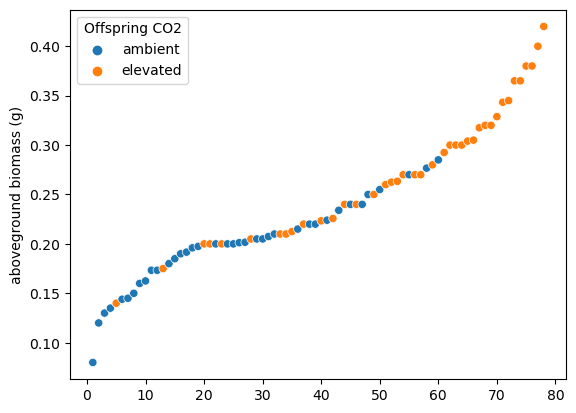

In [15]:
x_axis=[*range(1,84,1)]
#plt.scatter(x, test1['aboveground biomass (g)'], cmap='Offspring CO2')
sns.scatterplot(data=test, x=x_axis, y='aboveground biomass (g)', hue='Offspring CO2')

In [16]:
test1 = lupinus.groupby(['Maternal plot', 'Offspring CO2']).mean('August leaflet length').sort_values(['August leaflet length'])['August leaflet length'].dropna().to_frame().reset_index()
test1

,Maternal plot,Offspring CO2,August leaflet length
0,184.0,elevated,18.000000
1,205.0,ambient,19.666667
2,275.0,elevated,20.000000
3,354.0,ambient,20.000000
4,175.0,ambient,20.000000
...,...,...,...
75,355.0,elevated,30.000000
76,151.0,elevated,31.000000
77,108.0,elevated,32.000000
78,130.0,elevated,32.000000


<AxesSubplot:ylabel='August leaflet length'>

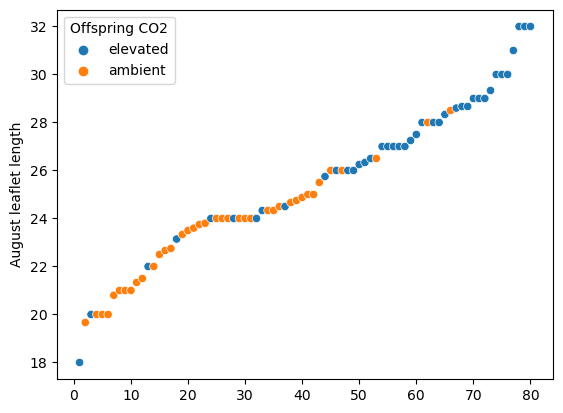

In [17]:
x_axis=[*range(1,81,1)]
#plt.scatter(x, test1['aboveground biomass (g)'], cmap='Offspring CO2')
sns.scatterplot(data=test1, x=x_axis, y='August leaflet length', hue='Offspring CO2')

# Antall lupinus planer vs andre planter i et plot
#### Teori: Jo flere lupinus, jo færre andre typer planter

In [18]:
poll.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,FLW_STATUS,PLTSP_CODE,PLTSP_NAME,NO_STALK,NO_FLWS,QC_NOTES
0,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-20,1.0,ND,1,NaN,NaN,NaN,NaN,NaN,NaN
1,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ACHIMILL,Achillea millefolium,4.0,36.0,NaN
2,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ERIGFOLI,Erigeron foliosus,14.0,1.0,NaN
3,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,VICIAMER,Vicia americana,3.0,2.3,NaN
4,SA026,2,Bunchgrass,BD,BGD01,2011,2011-08-02,3.0,"Andy, Tim",1,FLW,ACHIMILL,Achillea millefolium,2.0,26.0,NaN


In [19]:
poll.shape

(22619, 16)

In [20]:
# hvor lange lupinus er det i et plot (180 forskjellige plot)

In [21]:
poll.value_counts('PLOT_ID')

PLOT_ID
FM202    314
FM204    302
FM201    298
FM210    295
FM207    289
        ... 
BGS04     17
BGS09     17
BGS02     16
BGS05     16
BGS03     13
Length: 180, dtype: int64

In [27]:
lup = poll[poll['PLTSP_NAME']=='Lupinus laxiflorus']
lup.shape

(867, 16)

In [26]:
lup = lup.groupby('PLOT_ID').size().to_frame().reset_index().rename(columns={0:'Lupinus'})
lup.shape
lup

,PLOT_ID,Lupinus
0,BGD01,1
1,BGD02,1
2,BGD03,4
3,BGD04,2
4,BGD05,2
...,...,...
132,RP206,3
133,RP207,10
134,RP208,21
135,RP209,14


In [23]:
other = poll[poll['PLTSP_CODE']!='LUPILAXI']
other.shape

(21752, 16)

In [24]:
other = other.groupby('PLOT_ID').size().to_frame().reset_index().rename(columns={0:'Other'})
other.shape
other

,PLOT_ID,Other
0,BGD01,37
1,BGD02,27
2,BGD03,40
3,BGD04,34
4,BGD05,38
...,...,...
175,RP206,151
176,RP207,103
177,RP208,144
178,RP209,187


In [29]:
total = pd.merge(lup, other, on='PLOT_ID').sort_values('Lupinus')
total

,PLOT_ID,Lupinus,Other
0,BGD01,1,37
33,CNT01,1,35
36,CNT05,1,52
40,CPB05,1,199
42,CPB07,1,201
...,...,...,...
66,FM202,18,296
126,RP110,19,214
65,FM201,20,278
102,LOO06,21,224


<AxesSubplot:xlabel='Lupinus', ylabel='Other'>

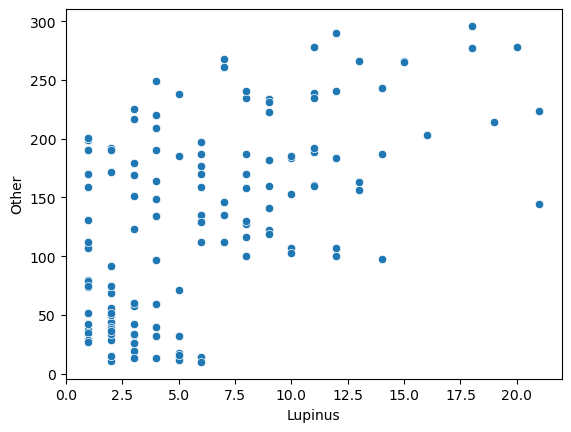

In [30]:
sns.scatterplot(data=total, x='Lupinus', y='Other')

In [33]:
mean_df = total.groupby('Lupinus').mean()
mean_df

,Other
Lupinus,
1,105.263158
2,66.736842
3,96.357143
4,129.666667
5,81.714286
6,129.090909
7,184.400000
8,162.666667
9,182.888889


<AxesSubplot:xlabel='Lupinus', ylabel='Other'>

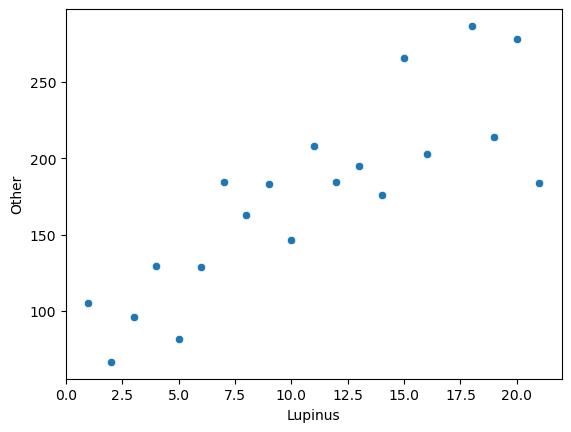

In [34]:
sns.scatterplot(data=mean_df, x='Lupinus', y='Other')

### Se på antall andre planter i plot der det ikke finnes lupinus

In [39]:
lup_plots=lup['PLOT_ID']
lup_plots

0      BGD01
1      BGD02
2      BGD03
3      BGD04
4      BGD05
       ...  
132    RP206
133    RP207
134    RP208
135    RP209
136    RP210
Name: PLOT_ID, Length: 137, dtype: object

In [43]:
new_other=other[~other['PLOT_ID'].isin(lup_plots)].mean()
new_other

/tmp/ipykernel_181/2387546604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_other=other[~other['PLOT_ID'].isin(lup_plots)].mean()


Other    73.651163
dtype: float64